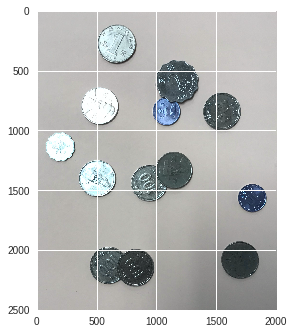

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

ret = cv2.imread("IMG_8255.JPG")
roi = ret[500:3000,500:2500]

plt.imshow(roi,'gray')

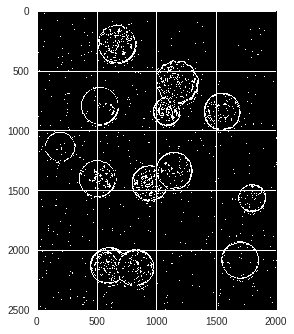

In [2]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray,25)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 1)

plt.imshow(thresh, 'gray')

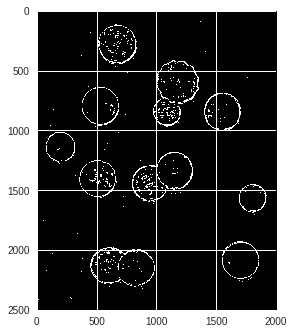

In [3]:

kernel = np.ones((1, 2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

plt.imshow(closing, 'gray')

In [4]:
circles = cv2.HoughCircles(closing, cv2.HOUGH_GRADIENT, 0.2, 120, param1 = 70, param2 = 30, minRadius = 100, maxRadius = 180)
circles_rnd = np.uint16(np.around(circles))

print(circles_rnd.shape)

(1, 13, 3)


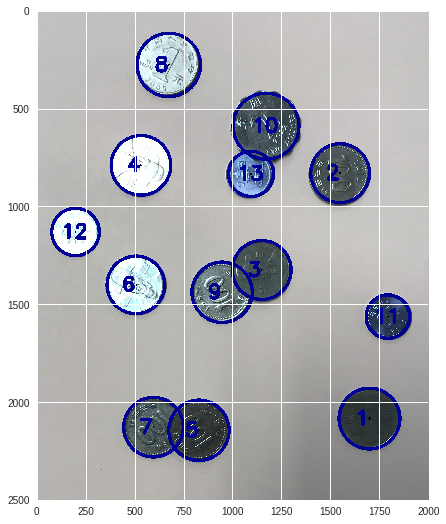

In [5]:
count = 1
for i in circles_rnd[0, :]:
    cv2.circle(roi, (i[0],i[1]),i[2],(0,0,150), 15)
    cv2.circle(roi, (i[0],i[1]),2,(0, 0, 0), 5)
    cv2.putText(roi, str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (0,0,150), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(roi)